In [89]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

X=np.arange(1,21).reshape((-1,1))

y=np.array([
    10,12,15,18,20,25,30,28,30,40,
    45,42,50,55,60,58,65,70,72,75
])

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [91]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(max_depth=3, random_state=42)
dt_reg.fit(x_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

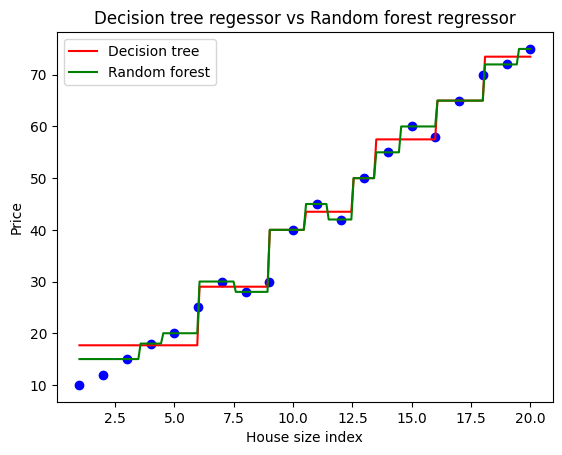

In [93]:
x_grid=np.linspace(1,20,200).reshape((-1,1))
y_pred=dt_reg.predict(x_grid)
plt.scatter(X,y,color='blue')
plt.plot(x_grid,y_pred,color='red',label='Decision tree ')
plt.plot(x_grid,rf.predict(x_grid),color='green',label='Random forest')
plt.xlabel("House size index")
plt.ylabel("Price")
plt.title("Decision tree regessor vs Random forest regressor")
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import *

y_test_pred=dt_reg.predict(x_test)


print("decision  tree regression")
print("MSE:",mean_squared_error(y_test,y_test_pred))
print("r2",r2_score(y_test,y_test_pred))


decision  tree regression
MSE: 28.486111111111114
r2 0.9435701315137842


In [95]:
y_test_pred_rf=rf.predict(x_test)
print("Random forest regression")
print("MSE:",mean_squared_error(y_test,y_test_pred_rf))
print("r2",r2_score(y_test,y_test_pred_rf))

Random forest regression
MSE: 15.333333333333334
r2 0.9696252682551038


In [96]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score


In [97]:
df = pd.read_csv("house_data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [98]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

print("\nMissing values:\n", df.isnull().sum())

df.describe()


Shape: (4600, 18)

Columns:
 Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

Missing values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [99]:
# Find target column automatically
possible_targets = ["price", "Price", "SalePrice", "saleprice", "house_price", "HousePrice"]

target_col = None
for col in possible_targets:
    if col in df.columns:
        target_col = col
        break

print("Target Column:", target_col)


Target Column: price


In [100]:
X = df.drop(columns=[target_col])
y = df[target_col]


In [101]:
# Fill numeric missing values with median
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Fill categorical missing values with 'missing'
cat_cols = X.select_dtypes(include=["object"]).columns
X[cat_cols] = X[cat_cols].fillna("missing")


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (3680, 17)
Test size: (920, 17)


In [103]:
categorical_features = X.select_dtypes(include=["object"]).columns
numeric_features = X.select_dtypes(exclude=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)


In [104]:
dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeRegressor(random_state=42))
])

dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("Decision Tree Results")
print("MSE:", dt_mse)
print("R² Score:", dt_r2)


Decision Tree Results
MSE: 1005077470242.0416
R² Score: 0.014481465750667666


In [105]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        max_depth=None,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\n✅ Random Forest Results")
print("MSE:", rf_mse)
print("R² Score:", rf_r2)



✅ Random Forest Results
MSE: 969547071269.2098
R² Score: 0.04932043861966129


In [106]:
results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest"],
    "MSE": [dt_mse, rf_mse],
    "R2 Score": [dt_r2, rf_r2]
})

print(results)


           Model           MSE  R2 Score
0  Decision Tree  1.005077e+12  0.014481
1  Random Forest  9.695471e+11  0.049320


In [107]:
unseen_sample = X_test.head(5)
predicted_prices = rf_model.predict(unseen_sample)

output = unseen_sample.copy()
output["Actual Price"] = y_test.head(5).values
output["Predicted Price"] = predicted_prices

output


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Actual Price,Predicted Price
3683,2014-06-30 00:00:00,3.0,2.50,1460,1613,2.0,0,0,3,1180,280,2007,0,6710 Alonzo Ave NW,Seattle,WA 98117,USA,544000.0,4.490411e+05
4411,2014-05-22 00:00:00,5.0,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0,3202 S 194th St,SeaTac,WA 98188,USA,0.0,3.292040e+05
2584,2014-06-16 00:00:00,3.0,3.25,2940,5432,3.0,0,3,4,2440,500,1978,2000,150 Highland Dr,Seattle,WA 98109,USA,1712500.0,1.181909e+06
69,2014-05-04 00:00:00,3.0,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0,13420 SE 182nd St,Renton,WA 98058,USA,365000.0,3.624373e+05
1844,2014-06-04 00:00:00,3.0,2.50,1720,8755,1.0,0,0,3,1000,720,1983,2009,31607 45th Pl SW,Federal Way,WA 98023,USA,275000.0,2.503978e+05


In [108]:
import pandas as pd
import numpy as np

compare_df = pd.DataFrame({
    "Actual": y_test.values,
    "DT_Pred": dt_pred,
    "RF_Pred": rf_pred,
    "DT_Error": y_test.values - dt_pred,
    "RF_Error": y_test.values - rf_pred
})

compare_df.head(10)


,Actual,DT_Pred,RF_Pred,DT_Error,RF_Error
0,5.440000e+05,329932.0,4.490411e+05,214068.000000,94958.920000
1,0.000000e+00,312000.0,3.292040e+05,-312000.000000,-329203.993214
2,1.712500e+06,1595000.0,1.181909e+06,117500.000000,530590.912500
3,3.650000e+05,349950.0,3.624373e+05,15050.000000,2562.726250
4,2.750000e+05,270000.0,2.503978e+05,5000.000000,24602.172530
5,6.250000e+05,557000.0,5.546221e+05,68000.000000,70377.865000
6,4.530000e+05,495000.0,5.341167e+05,-42000.000000,-81116.708333
7,3.000000e+05,268500.0,2.885335e+05,31500.000000,11466.483750
8,4.179857e+05,560000.0,5.983206e+05,-142014.285714,-180334.898214
9,6.725000e+05,850000.0,8.102338e+05,-177500.000000,-137733.750000


In [109]:
dt_unique = len(np.unique(dt_pred))
rf_unique = len(np.unique(rf_pred))

print("Decision Tree unique predictions:", dt_unique)
print("Random Forest unique predictions:", rf_unique)


Decision Tree unique predictions: 452
Random Forest unique predictions: 920


In [110]:
X_sens = X_test.copy()

# choose a numeric feature to perturb
feature_to_change = numeric_features[0]  # first numeric column
X_sens[feature_to_change] = X_sens[feature_to_change] * 1.01  # +1%

dt_pred_sens = dt_model.predict(X_sens)
rf_pred_sens = rf_model.predict(X_sens)

dt_change = np.mean(np.abs(dt_pred_sens - dt_pred))
rf_change = np.mean(np.abs(rf_pred_sens - rf_pred))

print("Avg prediction change after +1% input change:")
print("Decision Tree:", dt_change)
print("Random Forest:", rf_change)


Avg prediction change after +1% input change:
Decision Tree: 1.0869565217391304
Random Forest: 109.14442693401121


In [111]:
X_noise = X_test.copy()

noise_strength = 0.02  # 2% noise
for col in numeric_features:
    X_noise[col] = X_noise[col] * (1 + np.random.normal(0, noise_strength, size=len(X_noise)))

dt_pred_noise = dt_model.predict(X_noise)
rf_pred_noise = rf_model.predict(X_noise)

dt_noise_change = np.mean(np.abs(dt_pred_noise - dt_pred))
rf_noise_change = np.mean(np.abs(rf_pred_noise - rf_pred))

print("Avg prediction change after noise:")
print("Decision Tree:", dt_noise_change)
print("Random Forest:", rf_noise_change)


Avg prediction change after noise:
Decision Tree: 72990.72311789566
Random Forest: 31992.053598229057


In [112]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gbr_model.fit(X_train, y_train)

gbr_pred = gbr_model.predict(X_test)

gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)

print("Gradient Boosting Results")
print("MSE:", gbr_mse)
print("R² Score:", gbr_r2)


Gradient Boosting Results
MSE: 965074923674.0449
R² Score: 0.05370555765120433


In [113]:
results2 = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting"],
    "MSE": [rf_mse, gbr_mse],
    "R2 Score": [rf_r2, gbr_r2],
    "Unique Predictions": [len(np.unique(rf_pred)), len(np.unique(gbr_pred))]
})

results2


,Model,MSE,R2 Score,Unique Predictions
0,Random Forest,9.695471e+11,0.049320,920
1,Gradient Boosting,9.650749e+11,0.053706,757


In [114]:
print("RF Unique Predictions:", len(np.unique(rf_pred)))
print("GBR Unique Predictions:", len(np.unique(gbr_pred)))


RF Unique Predictions: 920
GBR Unique Predictions: 757


In [115]:
gbr_pred_sens = gbr_model.predict(X_sens)

rf_change2 = np.mean(np.abs(rf_pred_sens - rf_pred))
gbr_change2 = np.mean(np.abs(gbr_pred_sens - gbr_pred))

print("Avg prediction change after +1% input change:")
print("Random Forest:", rf_change2)
print("Gradient Boosting:", gbr_change2)


Avg prediction change after +1% input change:
Random Forest: 109.14442693401121
Gradient Boosting: 0.0


In [116]:
gbr_pred_noise = gbr_model.predict(X_noise)

rf_noise_change2 = np.mean(np.abs(rf_pred_noise - rf_pred))
gbr_noise_change2 = np.mean(np.abs(gbr_pred_noise - gbr_pred))

print("Avg prediction change after noise:")
print("Random Forest:", rf_noise_change2)
print("Gradient Boosting:", gbr_noise_change2)


Avg prediction change after noise:
Random Forest: 31992.053598229057
Gradient Boosting: 18502.34370025281
